# First Name: Wint Thiri
# Last Name: Swe

# Import libraries

In [78]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read in the csv file 

In [79]:
data = pd.read_csv("../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")

# 2. Printing the first 5 rows of airbnb

In [80]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# 3. Data cleaning

In [81]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [82]:
data.host_name.fillna("Blank hostnames", inplace =True)

In [83]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

host_name is the one we are interested in this data analysis

# 4. Data Visualisation

In [84]:
data['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

The most expensive cost of airbnb is 10000 while, surprisingly there are some airbnb without any cost.

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

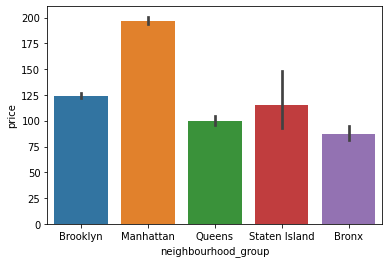

In [85]:
%matplotlib inline
sns.barplot(x=data['neighbourhood_group'], y=data['price'], data=data)

<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

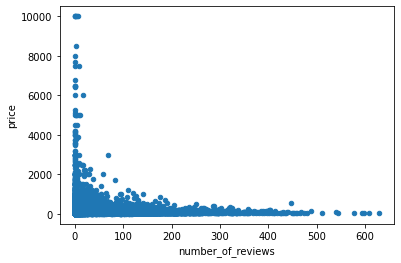

In [86]:
data.plot.scatter(x = 'number_of_reviews', y = 'price')

# 5. Application Purpose
## Here describe what will the application achieve, what will be input/output
## a) Getting host info with highest review with mininum price.
The input is the price & review. The application purpose is to help the user get the airbnb information of highest review with minimum price. The output gives out all the necessary information. This application does not specifically require user input as it can be already implemented in the test program. The way I imagined the way this application can be used is in promoting/advertising online where the user will get the information just by reading it on a website banner or online advertisements. 
For example: if 'Jennifer' is the host with highest review & minimum price for a certain month, then the airbnb advertising side can implemnent this application to post the host info with a banner and when the users look through their website, they will get to see 'Jennifer' has the highest reviews and they will be interested in her airbnb details.

## b) Searching for price/neighbourhood_group for a particular host name.
User can input any hostname, the output produces all the price and neighbourhood_group according to the hostname. This application require actual user input, therefore, it is better to implement this in simple search function. It can be simply implemented and mostly possibly can be used to search many more things in the future. 



# Application purpose part a: Which airbnb host has the highest review with lowest cost?

# 6. Data Structure Chosen and its justification for the application purpose
## Linked List

In [87]:
class Node:  
    def __init__(self,data):  
        self.data = data;  
        self.next = None;  
          
class LinkedList:  
    #Represent the head and tail of the singly linked list  
    def __init__(self):  
        self.head = None;  
        self.tail = None;  
          
    #push() will add a new node to the list  
    def push(self, data):  
        #Create a new node  
        newNode = Node(data);  
          
        #Checks if the list is empty  
        if(self.head == None):  
            #If list is empty, both head and tail will point to new node  
            self.head = newNode;  
            self.tail = newNode;  
        else:  
            #newNode will be added after tail such that tail's next will point to newNode  
            self.tail.next = newNode;  
            #newNode will become new tail of the list  
            self.tail = newNode;   

In [88]:
linked_list_price = LinkedList() # Store price values into linked list
for i in range(len(data.price)):
    linked_list_price.push(data.price[i])

## Justification

I have used singly linked list to store the price value from the dataset as I will only be storing the one data type (numeric). One of the reasons I used linked list over dynamic array is due to the fact elements in linked list can be manipulated easily. As it has reference/pointer which is used to access the first memory address, it gives more access to individual node. The linked list is dynamic in size so it can easily grow and shrink. In addition, linked list utilizes better memory efficiency by not wasting memory as the data size is only affected in run time. Insertion/deletion of elements in linked list can also be done at any node (especially in the middle) without having to readjusting the size of it. Not only linked list can be implemented as list, it can also be used for stacks, queues and deques.

# 7. Algorithm Implemented (minimum node & maximum node)

In [89]:
def minNode(data):  
    current = data.head;                      #1
    if(data.head == None):                    #1
        print("List is empty"); 
    else:  
        #Initializing min with head node data  
        min = data.head.data;                 #1
              
        while(current != None):               #n 
        #If current node's data is smaller than min  
        #Then, replace value of min with current node's data  
            if(min > current.data):           #1n
                min = current.data;           #1n
            current = current.next;           #1n
        return min

def maxNode(data):  
    current = data.head;                      #1
          
    if(data.head == None):                    #1
            print("List is empty");  
    else:  
        #Initializing max with head node data  
        max = data.head.data;                 #1
              
        while(current != None):               #n
            #If current node's data is greater than max  
            #Then, replace value of max with current node's data  
            if(max < current.data):           #1n
                max = current.data;           #1n
            current= current.next;            #1n
        return max

# 8. Algorithm efficiency evaluation and reasoning

### Total = 1+1+1+n+1n+1n+1n = 3+4n
### constants are dropped therefore,
### Time Complexity for each min/max algorithm: O(n)
As O(n) is a linear , the time complexity graph has straight line. Algorithm 1 has the O(n) complexity meaning that the running time is directly proportional to the volume of dataset in the algorithm, indicating, the time will increase as the volume of data set increases. The time complexity of this algorithm can be stated to be the most suitable as its big o notation is simple and fast, which makes it applicable to be used in the user program.

### O(n) graph
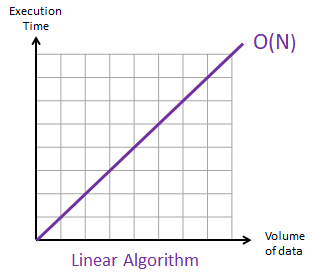

#### Test program that uses the minNode/maxNode algorithm implemented & store linked list

In [90]:
min_linkedlist_price = minNode(linked_list_price) # Get minimum price value from the linked list

min_price = data[data['price'] == min_linkedlist_price] # Store airbnb information where price is minimum
min_group = min_price.copy()

linkedlist_max_reviews = LinkedList() # Store review values into linked list
for i in (min_group.number_of_reviews): # store values only from the minimum group
    linkedlist_max_reviews.push(i)
    
    
max_linkedlist_reviews = maxNode(linkedlist_max_reviews) # maxNode algorithm for reviews
    # print(max_linkedlist_reviews)  print highest reviews
    # Output : Print host information of highest review with minimum price
min_group[min_group['number_of_reviews'] == max_linkedlist_reviews]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222


From this result, we can see that "Adeyemi' is the one with the highest reviews (95) with minimum price (0).

# Application purpose part B: Search up the price, neighbourhood_group for user's choice of host name

# 6. Data Structure Chosen and its justification for the application purpose
## Binary Search Tree

In [91]:
class BSTNode:
    def __init__(self, val=None):
        self.left = None
        self.right = None
        self.val = val

    #insert() will add a new child to the node 
    def insert(self, val): 
        if not self.val:
            self.val = val
            return 

        if self.val == val:
            return

        # check val is less than left child.
        # then first recursive to the left child if val greater than left.
        if val < self.val:
            if self.left:
                self.left.insert(val)
                return
            self.left = BSTNode(val)
            return

        # second recursive to the right child
        if self.right:
            self.right.insert(val)
            return
        self.right = BSTNode(val)
            
    #delete() will delete the node
    def delete(self, val):
        if self == None:
            return self
        if val < self.val:
            if self.left:
                self.left = self.left.delete(val)
            return self
        if val > self.val:
            if self.right:
                self.right = self.right.delete(val)
            return self
        if self.right == None:
            return self.left
        if self.left == None:
            return self.right
        min_larger_node = self.right
        while min_larger_node.left:
            min_larger_node = min_larger_node.left
        self.val = min_larger_node.val
        self.right = self.right.delete(min_larger_node.val)
        return self

    # inorder() will traverse in ascending order.
    def inorder(self, vals):
        if self.left is not None: # if left child is not empty
            self.left.inorder(vals) # recursive
        if self.val is not None:
            vals.append(self.val)
        if self.right is not None: # if right child is not empty
            self.right.inorder(vals) # recursive
        return vals

In [92]:
BST_hostname = BSTNode() # store host_name in Binary Search Tree
for i in range(len(data.host_name)):
    BST_hostname.insert(data.host_name[i])

BSThosts = BST_hostname.inorder([]) #  call inorder method to sort names

sub_data = data[['host_name','price', 'neighbourhood_group']] # store data to extract output

## Justification

As we can see from the image above, the host_name is the root. It has two children: names of the host. They also have 2 children: price and neighbourhood_group. I used Binary Search Tree (BST) as it stored the numeric data in organized way and I am using price so it is suitable for the application. Additionally, BST are useful for fast search and inserting/deleting elements and the application program I have planned is to search up hostnames. Moreover, BST can be used inorder treversal which came in handy as I wanted the tree nodes in ascending order to examine as well as extract the value for output. Therefore, I believe BST data structure will go well with the algorithm (binary search) I have implemented. 

# 7. Algorithm Implemented: Binary Search, using host_name as target

In [93]:
def binarySearch(arr, low, high, target):
 
    # Base case
    if high >= low:                                               #1
 
        mid = (high + low) // 2                                   #2
 
        # If element is present at the middle itself
        if arr[mid] == target:                                    #2
            return mid
 
        # If element is smaller than mid, then it can only       
        # be present in left subarray
        elif arr[mid] > target:                                   #(n-1)/2 + c, (n-1)/4 + 2c , (n-1)/8 + 3c
            return binarySearch(arr, low, mid - 1, target)       # (n)/2^k + kc 
 
        # Else the element can only be present in right subarray     
        else:
            return binarySearch(arr, mid + 1, high, target)    
 
    else:
        # Element is not present in the array
        return -1

# 8. Algorithm efficiency evaluation and reasoning

#### n/k^2 = 1
#### n = k^2
#### k = log n (base 2)
#### therefore, where k (number of comparison) = log n
#### Total = 1+2+2+ log n = log n + 5
#### the constants are dropped
#### Time complexity of binarysearch(): O(log n)
#### maximum number of comparison = worst case
#### Worst case: O(log n),
#### where the search target is either at the beginning or end of the node or not in the list.

#### minimum number of comparison = best case
#### Best case: O(1)
#### where the search target is the same with first middle element.

In terms of big O notation, getting O(log n) is one of the best complexity among the hierarchy. Although the time complexity for algorithm 1 is way faster. O(log n) means the run time is proportional to the logarithm of the input size. It is better than O(n) but slower.

#### Graph O(log n)
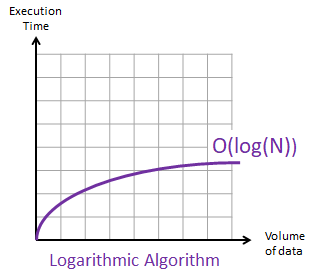

### Test the algorithm with simple user input

In [94]:
bsthosts_list = [] # list to print out the hostnames to test user input host_name
for i in range(len(BSThosts)):
    bsthosts_list.append(BSThosts[i])

print(bsthosts_list)

["'Cil", '(Ari) HENRY LEE', '(Email hidden by Airbnb)', '(Mary) Haiy', '-TheQueensCornerLot', '0123', '2018Serenity', '371', '475', '5 Star Stays', '@ Art House Monique', 'A', 'A & H', 'A Tree Grows In Brooklyn', 'A-B', 'A. Kaylee', 'A. Nicholas', 'A.B.', 'A.J.', 'A.M', 'A.R.', 'AFI Apartments', 'AGood', 'AHm', 'AJ And Freddy', 'Aaash', 'Aakash', 'Aalap', 'Aamir', 'Aamito', 'Aanchal', 'Aandrea', 'Aaron', 'Aaron & Ivy', 'Aaron Paul', 'Abayomi', 'Abbey', 'Abbi', 'Abbie', 'Abbott', 'Abby', 'Abby & Kurt', 'Abc', 'Abcstay', 'Abdes', 'Abdiaziz', 'Abdirazak', 'Abdoulaye', 'Abdul', 'Abdul Fattah', 'Abdul Kader', 'Abdul Rahman', 'Abdulla', 'Abdur', 'Abe', 'Abe & Gail', 'Abee', 'Abeer', 'Abel', 'Abella', 'Abena', 'Abeni', 'Abeyu', 'Abhi', 'Abhilasha Ashiv', 'Abhinaya', 'Abhishek', 'Abi', 'Abie', 'Abigael', 'Abigail', 'Abimbola', 'Abinav', 'Abir', 'Abosede', 'Aboubakar', 'Abra & Domenic', 'Abraham', 'Abram', 'Abrm', 'Abshan', 'Aby', 'Ac', 'Acadia', 'Acclaimed', 'Ace', 'Ada', 'Ada Azra', 'Adam', '

#### Test program to use the binarySearch algorithm

In [95]:
# user input : Malika
userinput = input("Please enter the hostname to see their respective price & neighbourhood_group: You can go through the list above : ")
test_result = binarySearch(BSThosts, 0, len(BSThosts)-1, userinput) # called binarysearch function

# sort values by price for user convenience
sub_data[sub_data['host_name'] == BSThosts[test_result]].sort_values(by=['price'])

Please enter the hostname to see their respective price & neighbourhood_group: You can go through the list above :  Malika


,host_name,price,neighbourhood_group
33065,Malika,75,Brooklyn
46687,Malika,90,Brooklyn
42473,Malika,100,Brooklyn
42582,Malika,100,Brooklyn
46683,Malika,100,Brooklyn
46760,Malika,100,Brooklyn
30254,Malika,175,Brooklyn


#### note to Ms. Shailey Chawla: to test the userinput for the above test program, I think you might need to go into edit and run all the codes and input name. I save the output but the input is not shown after saving. I have written a comment of input for the output shown above.